In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date, timedelta
import dateutil.parser
import pdb
import scipy
from scipy import ndimage as ndi
import json
import pickle

In [13]:
davis_data = pd.read_csv("C:/Henry/PythonProjects/Weather/NOAA/Davis/Davis Historic Weather.csv") 
chicago_data = pd.read_csv("C:/Henry/PythonProjects/Weather/NOAA/Chicago.csv") 

In [87]:
miami_data = pd.read_csv("C:/Henry/PythonProjects/Weather/NOAA/Miami.csv") 

In [108]:
def load_data(cvs_data):
    data_length = len(cvs_data.DATE)
    date_info= pd.DataFrame(np.zeros((data_length,3)),columns = ['Year','Month','Day'])

    for index in range(data_length):
        current_date = dateutil.parser.parse(cvs_data.DATE[index]) ;
        date_info['Year'][index] = current_date.year
        date_info['Month'][index] = current_date.month
        date_info['Day'][index] = current_date.day
    
    
    unique_year = date_info['Year'].unique()
    unique_year.sort()

    unique_month = date_info['Month'].unique()
    unique_month.sort()

    unique_day = date_info['Day'].unique()
    unique_day.sort()
    
    date_count = np.zeros((len(unique_month),len(unique_day)))
    output = { 'TMAX' : np.zeros((len(unique_year),len(unique_month),len(unique_day))),
             'TMIN' : np.zeros((len(unique_year),len(unique_month),len(unique_day))),
            'PRCP' : np.zeros((len(unique_year),len(unique_month),len(unique_day))), 
            'Year' : np.zeros(len(unique_year))
        
    }
    #pdb.set_trace()
    for year in range(len(unique_year)):
        current_year = unique_year[year].astype('int')
        print('getting information for current year  =' + str(current_year))
        output['Year'][year] = current_year
        for month in range(len(unique_month)):
            #print('getting information for current month  =' + str(month+1))
            for day in range(len(unique_day)):
               # pdb.set_trace

                date_logical = (date_info['Year']== current_year) & (date_info['Month']== month+1) & (date_info['Day']== day+1)
                if sum(date_logical)>1:
                    output['TMAX'][year,month,day] =  np.nanmean(cvs_data['TMAX'][date_logical])
                    output['TMIN'][year,month,day] =  np.nanmean(cvs_data['TMIN'][date_logical])
                    output['PRCP'][year,month,day] =  np.nanmean(cvs_data['PRCP'][date_logical])
                    #print(output['TMAX'][year,month,day])
                    #time.sleep(2.4)
                elif sum(date_logical)==1:
                    output['TMAX'][year,month,day] =  cvs_data['TMAX'][date_logical]
                    output['TMIN'][year,month,day] =  cvs_data['TMIN'][date_logical]
                    output['PRCP'][year,month,day] =  cvs_data['PRCP'][date_logical]
                else:
                    #print('year 3  =  ' + str(year))
                    output['TMAX'][year,month,day] = np.nan
                    output['TMIN'][year,month,day] = np.nan
                    output['PRCP'][year,month,day] = np.nan
                #print('current days = ' + str(sum(date_logical)))
                #print(sum(date_logical))
   # pdb.set_trace()
    
    return output

In [18]:
davis_stats = load_data(davis_data)
chicago_stats = load_data(chicago_data)

getting information for current year  =1893
getting information for current year  =1894
getting information for current year  =1895
getting information for current year  =1896
getting information for current year  =1897
getting information for current year  =1906
getting information for current year  =1907
getting information for current year  =1908
getting information for current year  =1909
getting information for current year  =1910
getting information for current year  =1911
getting information for current year  =1912
getting information for current year  =1913
getting information for current year  =1914
getting information for current year  =1915
getting information for current year  =1916
getting information for current year  =1917
getting information for current year  =1918
getting information for current year  =1919
getting information for current year  =1920
getting information for current year  =1921
getting information for current year  =1922
getting information for current 

getting information for current year  =2016
getting information for current year  =2017
getting information for current year  =2018
getting information for current year  =2019


In [109]:
Miami_stats = load_data(miami_data)

getting information for current year  =1948
getting information for current year  =1949
getting information for current year  =1950
getting information for current year  =1951
getting information for current year  =1952
getting information for current year  =1953
getting information for current year  =1954
getting information for current year  =1955
getting information for current year  =1956
getting information for current year  =1957
getting information for current year  =1958
getting information for current year  =1959
getting information for current year  =1960
getting information for current year  =1961
getting information for current year  =1962
getting information for current year  =1963
getting information for current year  =1964
getting information for current year  =1965
getting information for current year  =1966
getting information for current year  =1967
getting information for current year  =1968
getting information for current year  =1969
getting information for current 

In [66]:
f = open("davis_stats.pkl","wb")
pickle.dump(davis_stats,f)
f.close()

In [95]:
def plot_weather(daily_stats):
    base_logical = (daily_stats['Year']>0) & (daily_stats['Year']<1961)
    
    daily_mean = np.nanmean(daily_stats['TMAX'][base_logical,:,:],axis=0)
    daily_std = np.nanstd(daily_stats['TMAX'][base_logical,:,:],axis=0)
    year_logical = (daily_stats['Year']>1920)
    daily_max =(daily_stats['TMAX'][year_logical,:,:]-daily_mean)/daily_std
    max_e  = np.nanstd(daily_max,axis=(1,2))/np.sqrt(daily_max.shape[0])
    

    daily_mean = np.nanmean(daily_stats['TMIN'][base_logical,:,:],axis=0)
    daily_std = np.nanstd(daily_stats['TMIN'][base_logical,:,:],axis=0)
    daily_min =(daily_stats['TMIN'][year_logical,:,:]-daily_mean)/daily_std

    daily_mean = np.nanmean(daily_stats['PRCP'][base_logical,:,:],axis=0)
    daily_std = np.nanstd(daily_stats['PRCP'][base_logical,:,:],axis=0)
    daily_prcp =(daily_stats['PRCP'][year_logical,:,:])
    

    min_e  = np.nanstd(daily_max,axis=(1,2))/np.sqrt(daily_max.shape[0])
    gauss_filtered_max_e = np.zeros((2,len(np.nanmean(daily_max,axis=(1,2)))))
    gauss_filtered_min_e = np.zeros((2,len(np.nanmean(daily_min,axis=(1,2)))))

    gauss_filtered_max = ndi.filters.gaussian_filter1d(np.nanmean(daily_max,axis=(1,2)), 1)
    gauss_filtered_min = ndi.filters.gaussian_filter1d(np.nanmean(daily_min,axis=(1,2)), 1)
    average_yearly_prcp = np.nansum(daily_prcp,axis=(1,2))
    z_score_early_prcp = (average_yearly_prcp-np.nanmean(average_yearly_prcp))/np.nanstd(average_yearly_prcp)
    gauss_filtered_prcp = ndi.filters.gaussian_filter1d(z_score_early_prcp, 1)

    gauss_filtered_max_e[0,:] = ndi.filters.gaussian_filter1d(max_e,1)+gauss_filtered_max
    gauss_filtered_max_e[1,:] = -1*ndi.filters.gaussian_filter1d(max_e,1)+gauss_filtered_max

    gauss_filtered_min_e[0,:] = ndi.filters.gaussian_filter1d(min_e,1)+gauss_filtered_min
    gauss_filtered_min_e[1,:] = -1*ndi.filters.gaussian_filter1d(min_e,1)+gauss_filtered_min
    plt.figure(1),plt.cla()
    plt.figure(1),plt.plot(daily_stats['Year'][year_logical],gauss_filtered_max,'r',label = 'Max Temp')
    plt.plot(daily_stats['Year'][year_logical],gauss_filtered_min,'b',label = 'Min Temp')
    #plt.plot(unique_year[year_logical],gauss_filtered_min_e[0,:],'--')
    #plt.plot(unique_year[year_logical],gauss_filtered_min_e[1,:],'--')
    plt.fill_between(daily_stats['Year'][year_logical],gauss_filtered_min_e[0,:], gauss_filtered_min_e[1,:],
                     facecolor="blue", # The fill color
                     color= "blue",     # The outline color
                     alpha=0.3)          # Transparency of the fill

    plt.fill_between(daily_stats['Year'][year_logical],gauss_filtered_max_e[0,:], gauss_filtered_max_e[1,:],
                     facecolor="red", # The fill color
                     color='red',       # The outline color
                     alpha=0.3)          # Transparency of the fill
    #plt.errorbar(unique_year[year_logical],gauss_filtered_max,gauss_filtered_max_e)
    #plt.errorbar(unique_year[year_logical],gauss_filtered_min,gauss_filtered_min_e)
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(2),plt.cla
    plt.figure(2),plt.plot(daily_stats['Year'][year_logical],z_score_early_prcp,'b',label = 'Percipitation')
    plt.grid(True)
    
    m = np.linspace(start =1 , stop = 12,num= 12)
    base_logical = (daily_stats['Year']>0) & (daily_stats['Year']<1961)
    yearly_monthly_temp = np.nanmean(daily_stats['TMAX'][base_logical,:,:],axis=(2))
    monthly_temp_e = np.nanstd(yearly_monthly_temp,axis=(0))
    monthly_temp = np.nanmean(yearly_monthly_temp,axis=0)

    yearly_monthly_prcp = np.nansum(daily_prcp,axis=2)
    monthly_prcp_e = np.nanstd(yearly_monthly_prcp,axis=(0))

    monthly_prcp = np.nanmean(yearly_monthly_prcp,axis=0)


    plt.figure(3),plt.cla
    plt.plot(m,monthly_temp)
    plt.fill_between(m,monthly_temp-monthly_temp_e, monthly_temp+monthly_temp_e,
                     facecolor="red", # The fill color
                     color='red',       # The outline color
                     alpha=0.3)          # Transparency of the fill
    plt.grid(True)
    plt.show()



    plt.figure(4),plt.cla
    plt.figure(4),plt.plot(m,monthly_prcp,'b',label = 'Percipitation')
    #plt.figure(2),plt.plot(m,monthly_prcp+monthly_prcp_e,'--')
    plt.fill_between(m,monthly_prcp-monthly_prcp_e, monthly_prcp+monthly_prcp_e,
                     facecolor="red", # The fill color
                     color='red',       # The outline color
                     alpha=0.3)          # Transparency of the fill
    plt.grid(True)
    plt.show()
    
    
    
    d = np.linspace(start =1 , stop = 372,num= 372)
    temp = daily_stats['TMAX'];
    temp2 = np.reshape(temp,(temp.shape[0],temp.shape[2]*temp.shape[1]))
    current_year = daily_stats['TMAX'][-1,:,:]
    current_year = np.reshape(current_year,current_year.shape[0]*current_year.shape[1])
    is_day = np.isfinite(np.nanmean(temp2,axis=0))
    daily_average = np.nanmean(temp2,axis=0)
    daily_average_e = np.nanstd(temp2,axis=0)
    plt.figure(5),plt.plot(d[is_day],daily_average[is_day])
    #pdb.set_trace()
    plt.plot(d[is_day],current_year[is_day])
    plt.fill_between(d[is_day],daily_average[is_day]-daily_average_e[is_day], daily_average[is_day]+daily_average_e[is_day],
                     facecolor="red", # The fill color
                     color='red',       # The outline color
                     alpha=0.3)          # Transparency of the fill
    plt.grid(True)
    plt.show()
    
    
    d = np.linspace(start =1 , stop = 31,num= 31)
    current_month = daily_stats['TMAX'][:,8,:];
    #current_month = np.reshape(current_month,(current_month.shape[0],current_month.shape[2]*temp.shape[1]))
    is_day = np.isfinite(np.nanmean(current_month,axis=0))
    daily_average = np.nanmean(current_month,axis=0)
    daily_average_e = np.nanstd(current_month,axis=0)
    plt.figure(6),plt.plot(d[is_day],daily_average[is_day])
    plt.fill_between(d[is_day],daily_average[is_day]-daily_average_e[is_day], daily_average[is_day]+daily_average_e[is_day],
                     facecolor="red", # The fill color
                     color='red',       # The outline color
                     alpha=0.3)          # Transparency of the fill
    plt.grid(True)
    plt.show()
    
    
    
    

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


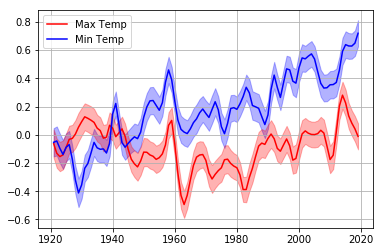

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice


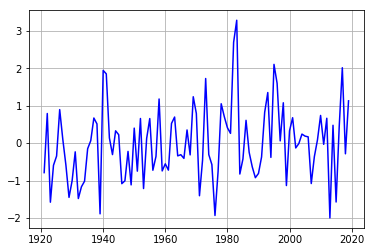

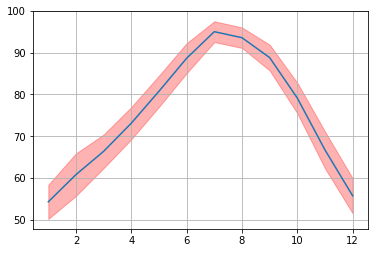

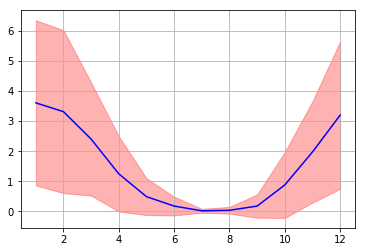

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: Mean of empty slice


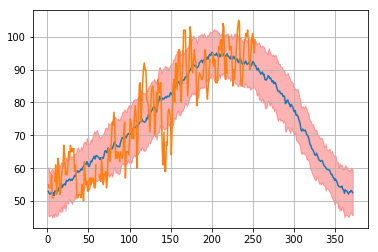

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: Mean of empty slice


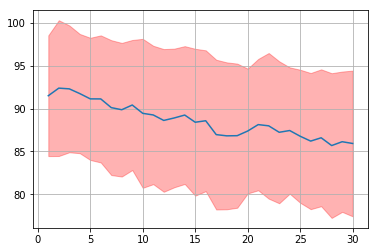

In [51]:
plot_weather(davis_stats)

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


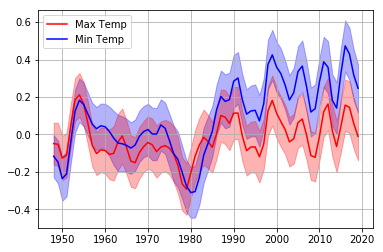

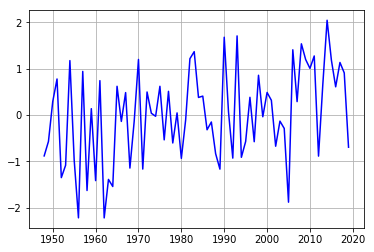

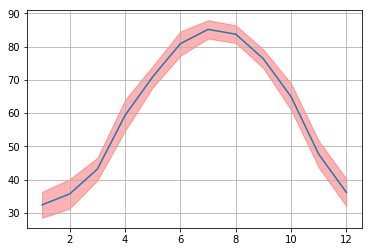

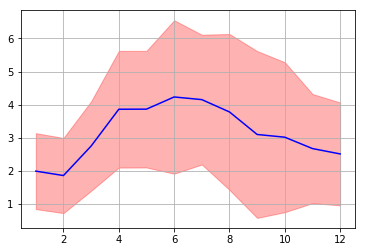

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: Mean of empty slice


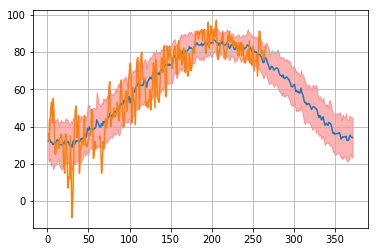

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: Mean of empty slice


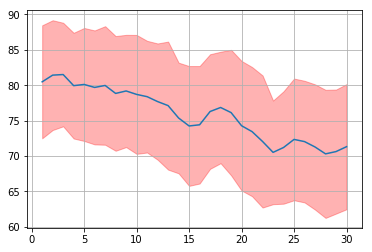

In [55]:
plot_weather(chicago_stats)

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


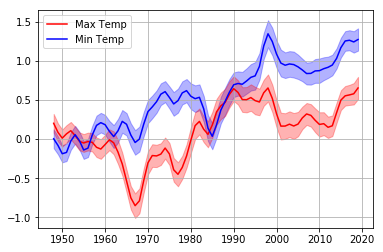

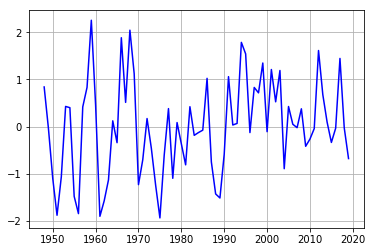

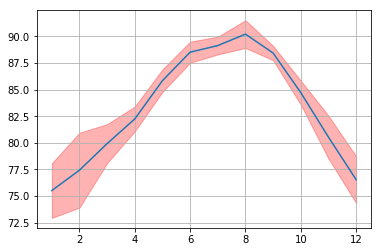

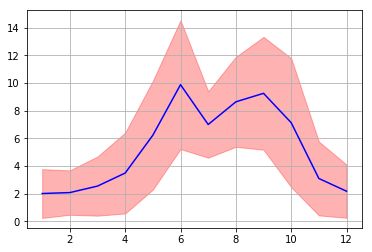

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: Mean of empty slice


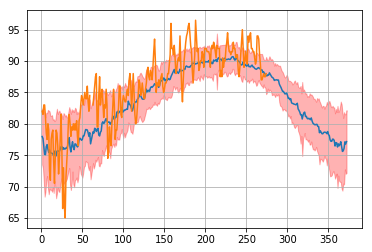

C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: Mean of empty slice
C:\Users\hjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: Mean of empty slice


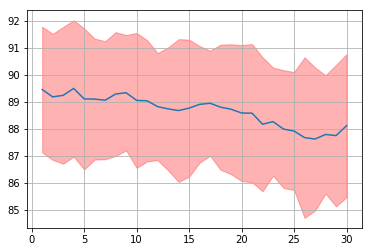

In [110]:
plot_weather(Miami_stats)


In [97]:
Miami_stats

{'TMAX': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        ...,
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
      

In [98]:
miami_data

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-01,NaN,NaN,0.00,0.0,0.0,81.0,69.0,NaN
1,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-02,NaN,NaN,0.14,0.0,0.0,81.0,69.0,NaN
2,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-03,NaN,NaN,0.00,0.0,0.0,72.0,60.0,NaN
3,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-04,NaN,NaN,0.00,0.0,0.0,72.0,57.0,NaN
4,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-05,NaN,NaN,0.00,0.0,0.0,66.0,48.0,NaN
5,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-06,NaN,NaN,0.00,0.0,0.0,69.0,50.0,NaN
6,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-07,NaN,NaN,0.00,0.0,0.0,74.0,51.0,NaN
7,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-08,NaN,NaN,0.00,0.0,0.0,76.0,56.0,NaN
8,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-09,NaN,NaN,0.00,0.0,0.0,79.0,54.0,NaN
9,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",1948-01-10,NaN,NaN,0.00,0.0,0.0,76.0,58.0,NaN
